# Graded Project - Rent The Run Way

**Busines Context**
- Customer segmentation is one of the most important marketing tools at your disposal, because it can help a business to better understand its target audience. This is because it groups customers based on common characteristics.
- Segmentation can be based on the customer’s habits and lifestyle, in particular, their buying habits. Different age groups, for example, tend to spend their money in different ways, so brands need to be aware of who exactly is buying their product.
- Segmentation also focuses more on the personality of the consumer, including their opinions, interests, reviews, and rating. Breaking down a large customer base into more manageable clusters, making it easier to identify your target audience and launch campaigns and promote the business to the most relevant people

**Data Description**

The dataset contains measurements of clothing fit from RentTheRunway.
RentTheRunWay is a unique platform that allows women to rent clothes for
various occasions. The collected data is of several categories. This dataset
contains self-reported fit feedback from customers as well as other side
information like reviews, ratings, product categories, catalog sizes, customers’
measurements (etc.)

**Objective**

Based on the given users and items data of an e-commerce company, segment
the similar user and items into suitable clusters. Analyze the clusters and provide
your insights to help the organization promote their business.

### 1. Load the required libraries and read the dataset.

In [1]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,LabelEncoder
from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer

In [2]:
# load dataset
dataFrame=pd.read_csv("renttherunway.csv")
dataFrame.head()

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features

In [3]:
dataFrame.shape

(192544, 16)

In [4]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      192544 non-null  int64  
 1   fit             192544 non-null  object 
 2   user_id         192544 non-null  int64  
 3   bust size       174133 non-null  object 
 4   item_id         192544 non-null  int64  
 5   weight          162562 non-null  object 
 6   rating          192462 non-null  float64
 7   rented for      192534 non-null  object 
 8   review_text     192482 non-null  object 
 9   body type       177907 non-null  object 
 10  review_summary  192199 non-null  object 
 11  category        192544 non-null  object 
 12  height          191867 non-null  object 
 13  size            192544 non-null  int64  
 14  age             191584 non-null  float64
 15  review_date     192544 non-null  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 23.5+ 

In [5]:
dataFrame.describe()

,Unnamed: 0,user_id,item_id,rating,size,age
count,192544.000000,192544.000000,1.925440e+05,192462.000000,192544.000000,191584.000000
mean,96271.500000,499494.100149,1.045684e+06,9.092371,12.245175,33.871017
std,55582.809453,289059.719328,8.053148e+05,1.430044,8.494877,8.058083
min,0.000000,9.000000,1.233730e+05,2.000000,0.000000,0.000000
25%,48135.750000,250654.250000,1.950760e+05,8.000000,8.000000,29.000000
50%,96271.500000,499419.000000,9.483960e+05,10.000000,12.000000,32.000000
75%,144407.250000,750974.000000,1.678888e+06,10.000000,16.000000,37.000000
max,192543.000000,999997.000000,2.966087e+06,10.000000,58.000000,117.000000


In [6]:
dataFrame.isnull().sum()/len(dataFrame) * 100

Unnamed: 0         0.000000
fit                0.000000
user_id            0.000000
bust size          9.561970
item_id            0.000000
weight            15.571506
rating             0.042588
rented for         0.005194
review_text        0.032200
body type          7.601899
review_summary     0.179180
category           0.000000
height             0.351608
size               0.000000
age                0.498587
review_date        0.000000
dtype: float64

### 3. Check if there are any duplicate records in the dataset? If any, drop them.

In [7]:
len(dataFrame[dataFrame.duplicated()])

0

### 4. Drop the columns which you think redundant for the analysis.(Hint: drop columns like ‘id’, ‘review’)

In [8]:
# Columns List Before Removing
dataFrame.columns

Index(['Unnamed: 0', 'fit', 'user_id', 'bust size', 'item_id', 'weight',
       'rating', 'rented for', 'review_text', 'body type', 'review_summary',
       'category', 'height', 'size', 'age', 'review_date'],
      dtype='object')

In [9]:
dataFrame=dataFrame.drop(['Unnamed: 0', 'user_id', 'item_id','review_text', 'review_summary','review_date'],axis=1)

In [10]:
# Columns List After Removing
dataFrame.columns

Index(['fit', 'bust size', 'weight', 'rating', 'rented for', 'body type',
       'category', 'height', 'size', 'age'],
      dtype='object')

### 5. Check the column 'weight', Is there any presence of string data? If yes, remove the string data and convert to float. (Hint: 'weight' has the suffix as lbs)

In [11]:
# Weight Data Before Conversion
dataFrame['weight']

0         137lbs
1         132lbs
2            NaN
3         135lbs
4         145lbs
           ...  
192539    140lbs
192540    100lbs
192541    135lbs
192542    165lbs
192543    155lbs
Name: weight, Length: 192544, dtype: object

In [12]:
dataFrame['weight']=pd.to_numeric(dataFrame['weight'].str.replace('lbs',''))
# Converting NaN Values or Empty Values to Float.
dataFrame.weight.fillna(0,inplace=True)

In [13]:
# Weight Data After Conversion
dataFrame['weight']

0         137.0
1         132.0
2           0.0
3         135.0
4         145.0
          ...  
192539    140.0
192540    100.0
192541    135.0
192542    165.0
192543    155.0
Name: weight, Length: 192544, dtype: float64

### 6. Check the unique categories for the column 'rented for' and group 'party: cocktail' category with 'party'.

In [14]:
dataFrame['rented for'] =dataFrame['rented for'].replace(['party', 'party: cocktail' ], 'party' )
dataFrame['rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan], dtype=object)

### 7. The column 'height' is in feet with a quotation mark, Convert to inches with float datatype.

In [15]:
# Height Data Before Conversion
dataFrame['height']

0         5' 8"
1         5' 6"
2         5' 4"
3         5' 5"
4         5' 9"
          ...  
192539    5' 9"
192540    5' 1"
192541    5' 8"
192542    5' 6"
192543    5' 6"
Name: height, Length: 192544, dtype: object

In [16]:
dataFrame['height']=dataFrame['height'].str.replace('"','')
dataFrame["height"] = (dataFrame.height.str.split("'").str[0].astype(float) * 12) + (
    dataFrame.height.str.split("'").str[1].astype(float)
)

In [17]:
# Height Data After Conversion
dataFrame['height']

0         68.0
1         66.0
2         64.0
3         65.0
4         69.0
          ... 
192539    69.0
192540    61.0
192541    68.0
192542    66.0
192543    66.0
Name: height, Length: 192544, dtype: float64

### 8. Check for missing values in each column of the dataset? If it exists, impute them with appropriate methods.

In [18]:
# Missing Values Before Fix
dataFrame.isnull().sum()/len(dataFrame) * 100

fit           0.000000
bust size     9.561970
weight        0.000000
rating        0.042588
rented for    0.005194
body type     7.601899
category      0.000000
height        0.351608
size          0.000000
age           0.498587
dtype: float64

In [19]:
missingValues = dataFrame.isnull().sum()/len(dataFrame)

columnIndex = [x for x in missingValues[missingValues>0].index]

numericalColumns = [y for y in columnIndex if y in dataFrame.columns and  dataFrame[y].dtype!=object]
categoricalColumns = [z for z in columnIndex if z in dataFrame.columns and  dataFrame[z].dtype==object]

for columns in numericalColumns:
    dataFrame[columns]=dataFrame[columns].fillna(dataFrame[columns].median())
    
for columns in categoricalColumns:
    dataFrame[columns]=dataFrame[columns].fillna(dataFrame[columns].mode()[0])

In [20]:
# Missing Values After Fix
dataFrame.isnull().sum()/len(dataFrame) * 100

fit           0.0
bust size     0.0
weight        0.0
rating        0.0
rented for    0.0
body type     0.0
category      0.0
height        0.0
size          0.0
age           0.0
dtype: float64

### 9. Check the statistical summary for the numerical and categorical columns and write your findings.

In [21]:
dataFrame.describe()

,weight,rating,height,size,age
count,192544.000000,192544.000000,192544.000000,192544.000000,192544.000000
mean,115.997751,9.092758,65.309529,12.245175,33.861689
std,53.726993,1.429862,2.658857,8.494877,8.039050
min,0.000000,2.000000,54.000000,0.000000,0.000000
25%,115.000000,8.000000,63.000000,8.000000,29.000000
50%,130.000000,10.000000,65.000000,12.000000,32.000000
75%,145.000000,10.000000,67.000000,16.000000,37.000000
max,300.000000,10.000000,78.000000,58.000000,117.000000


- Weight is between 0 to 300 lbs (Average is 115 lbs)
- Rating is between 1 to 10 (Average is 9)
- Height is between 54 to 78 Inches (Average is 65 Inches)
- Size is Between 0 to 58 (Average is 33)
- Age is between 0 and 117 years (Average is 33)

In [22]:
dataFrame.describe(include='O')

,fit,bust size,rented for,body type,category
count,192544,192544,192544,192544,192544
unique,3,106,8,7,68
top,fit,34b,wedding,hourglass,dress
freq,142058,45696,57794,69986,92884


### 10. Are there outliers present in the column age? If yes, treat them with the appropriate method.

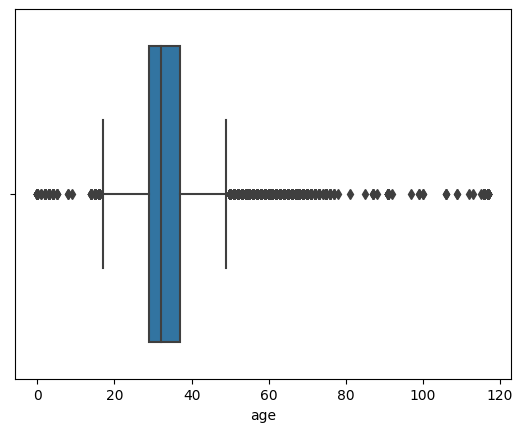

In [23]:
# Plot to See Outliers in Age Column
sns.boxplot(x = dataFrame['age'])
plt.show()

In [24]:
quantileOne = dataFrame['age'].quantile(0.25)
quantileThree = dataFrame['age'].quantile(0.75)
IQR = quantileThree-quantileOne
print('Quantile Values')
print('Q1: ',quantileOne)
print('Q3: ',quantileThree)
print('IQR: ', IQR)
print('\n')
lowerWhisker  = quantileOne-(1.5*IQR)
upperWhisker  = quantileThree+(1.5*IQR)
print('Whisker Values')
print('Lower Whisker:', lowerWhisker)
print('Upper Whisher:',upperWhisker)

Quantile Values
Q1:  29.0
Q3:  37.0
IQR:  8.0


Whisker Values
Lower Whisker: 17.0
Upper Whisher: 49.0


In [25]:
#treating outliers
dataFrameNew = dataFrame.loc[(dataFrame['age'] < upperWhisker) & (dataFrame['age'] > lowerWhisker)]

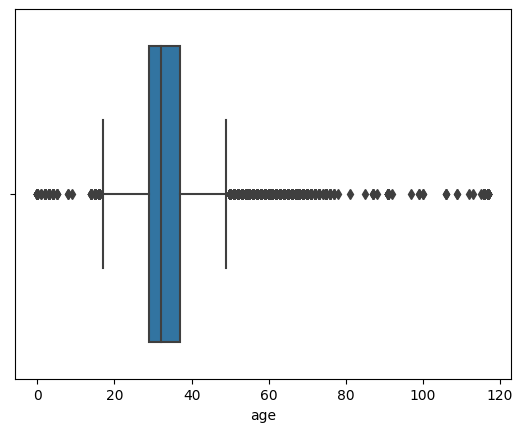

In [26]:
sns.boxplot(x = dataFrame['age'])
plt.show()

In [27]:
dataFrame.dropna(inplace=True)

### 11. Check the distribution of the different categories in the column 'rented for' using appropriate plot.

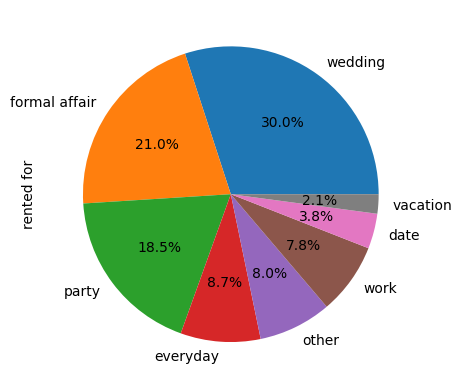

In [28]:
dataFrame['rented for'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

### 12. Encode the categorical variables in the dataset.

In [29]:
dataFrameTwo = dataFrame.copy();

In [30]:
dataFrameTwoColumns = dataFrameTwo.select_dtypes('object').columns
dataFrameTwoColumns

Index(['fit', 'bust size', 'rented for', 'body type', 'category'], dtype='object')

In [31]:
from sklearn.preprocessing import LabelEncoder
for column in dataFrameTwoColumns:
    labelEncoder=LabelEncoder()
    dataFrameTwo[column]=labelEncoder.fit_transform(dataFrameTwo[column])
dataFrameTwo

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,0,39,137.0,10.0,5,3,44,68.0,14,28.0
1,0,37,132.0,10.0,3,6,20,66.0,12,36.0
2,0,37,0.0,10.0,4,3,45,64.0,4,116.0
3,0,38,135.0,8.0,2,4,16,65.0,8,34.0
4,0,37,145.0,10.0,6,1,20,69.0,12,27.0
...,...,...,...,...,...,...,...,...,...,...
192539,0,41,140.0,10.0,7,3,26,69.0,8,42.0
192540,0,25,100.0,10.0,7,5,16,61.0,4,29.0
192541,0,48,135.0,6.0,1,6,16,68.0,8,31.0
192542,0,51,165.0,10.0,6,4,16,66.0,16,31.0


### 13. Standardize the data, so that the values are within a particular range

In [32]:
# Scaling all Features
scaledFeatures = dataFrame.select_dtypes(include=['int64','float64'])
scaler = StandardScaler()
scaler.fit(scaledFeatures)
scaledFeaturesDataFrame =pd.DataFrame(scaler.transform(scaledFeatures),columns=scaledFeatures.columns)
scaledFeaturesDataFrame

,weight,rating,height,size,age
0,0.390908,0.634498,1.011893,0.206575,-0.729154
1,0.297845,0.634498,0.259688,-0.028862,0.265991
2,-2.159027,0.634498,-0.492517,-0.970608,10.217442
3,0.353683,-0.764242,-0.116415,-0.499735,0.017205
4,0.539809,0.634498,1.387995,-0.028862,-0.853547
...,...,...,...,...,...
192539,0.446746,0.634498,1.387995,-0.499735,1.012350
192540,-0.297761,0.634498,-1.620824,-0.970608,-0.604761
192541,0.353683,-2.162982,1.011893,-0.499735,-0.355974
192542,0.912063,0.634498,0.259688,0.442012,-0.355974


### 14. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [33]:
covMatrix = np.cov(scaledFeaturesDataFrame.T)
print('Covariance Matrix: \n',covMatrix)

Covariance Matrix: 
 [[ 1.00000519 -0.01067186  0.09999958  0.08772758  0.06137198]
 [-0.01067186  1.00000519  0.00174836 -0.03672869 -0.03513107]
 [ 0.09999958  0.00174836  1.00000519  0.22842543 -0.00728095]
 [ 0.08772758 -0.03672869  0.22842543  1.00000519  0.15512023]
 [ 0.06137198 -0.03513107 -0.00728095  0.15512023  1.00000519]]


In [34]:
eigValues, eigVectors = np.linalg.eig(covMatrix)
print('Eigen Values:','\n',eigValues)
print('\n')
print('Eigen Vectors','\n',eigVectors)

Eigen Values: 
 [1.34007031 0.71795973 1.03279831 0.93848125 0.97071637]


Eigen Vectors 
 [[-0.39274891  0.08859475 -0.10206895 -0.90407675  0.10063016]
 [ 0.11636651  0.04571497 -0.63715251  0.10962975  0.75258685]
 [-0.53764259 -0.59690653 -0.47136023  0.19400967 -0.30793314]
 [-0.6409564   0.68495649  0.00105386  0.34633124  0.00794109]
 [-0.36376155 -0.40570718  0.60119633  0.11419924  0.57323706]]


In [35]:
totalEigValues = sum(eigValues)
xVar = [(i/totalEigValues)*100 for i in sorted(eigValues,reverse=True)]
yVar = np.cumsum(xVar)
#Explained Variance
print('Explained Variance (EV): \n',xVar)
print('\n')
#Cummulative Variance Explained
print('Cummulative Variance Explained (CVE): \n',yVar)

Explained Variance (EV): 
 [26.80126705757342, 20.655859011281112, 19.414226475001286, 18.76952747785078, 14.359119978293416]


Cummulative Variance Explained (CVE): 
 [ 26.80126706  47.45712607  66.87135254  85.64088002 100.        ]


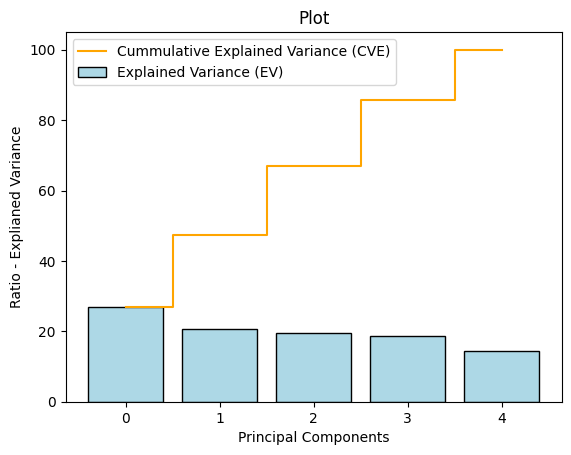

In [36]:
plt.bar(range(5),xVar,align='center',color='lightblue',edgecolor='black',label='Explained Variance (EV)')
plt.step(range(5),yVar,where='mid',color='orange',label='Cummulative Explained Variance (CVE)')
plt.xlabel('Principal Components')
plt.ylabel('Ratio - Explianed Variance')
plt.title('Plot')
plt.legend(loc='best')
plt.show()

### 15. Apply K-means clustering and segment the data. (You may use original data or PCA transformed data)

In [37]:
pcaVar = PCA(n_components=5)
pcaDataFrame = pd.DataFrame(pcaVar.fit_transform(scaledFeaturesDataFrame),columns=['PC1','PC2','PC3','PC4','PC5'])
pcaDataFrameOne = pcaDataFrame.head(10000)
pcaDataFrameOne

,PC1,PC2,PC3,PC4,PC5
0,0.490898,-1.359284,-0.211081,-0.099259,0.103049
1,0.261021,-0.397196,0.579767,-0.128952,0.227299
2,1.908007,6.189917,6.261222,2.756605,4.678400
3,-0.148799,0.515529,-0.497825,-0.597234,0.283391
4,0.555434,-1.626795,-0.385088,-0.256655,0.425152
...,...,...,...,...,...
9995,-0.258093,-1.225113,-0.203088,-0.104216,0.259276
9996,-0.568192,0.726413,-0.837568,2.048098,-0.837479
9997,1.809446,1.886964,-4.549094,-0.361368,1.846519
9998,2.803479,0.639365,-0.150976,-0.175493,-2.236123


In [38]:
clusterErrors = []
clusterRange = range(1,15)
for totalClusters in clusterRange:
    clustersVar = KMeans(totalClusters, n_init=8)
    clustersVar.fit(pcaDataFrameOne)
    clusterErrors.append(clustersVar.inertia_) 
clusterDataFrame = pd.DataFrame({'totalClusters':clusterRange,'clusterErrors':clusterErrors})
clusterDataFrame

,totalClusters,clusterErrors
0,1,49379.159894
1,2,40342.435257
2,3,33281.086253
3,4,28771.949828
4,5,24868.657071
5,6,22462.798568
6,7,21082.019512
7,8,19961.141597
8,9,18490.021794
9,10,17661.707418


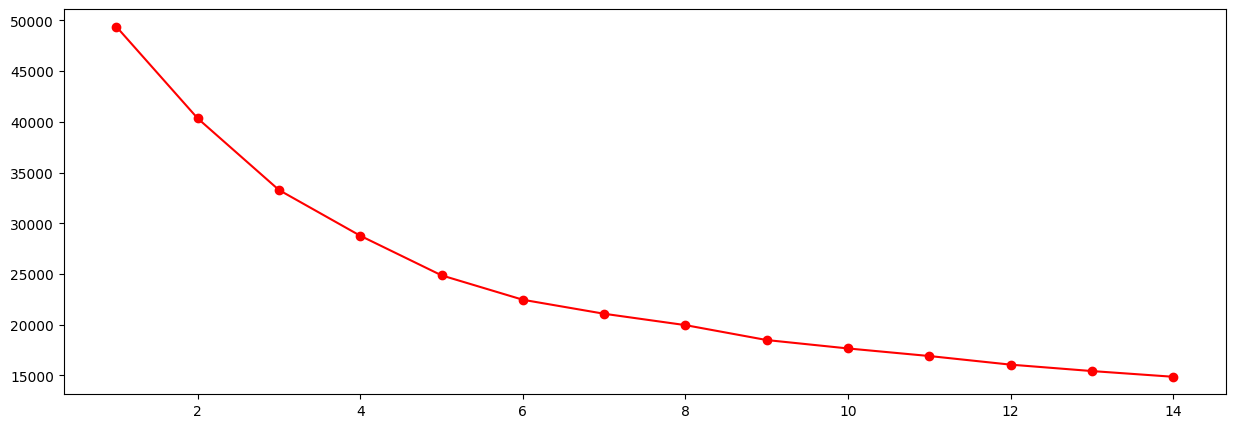

In [39]:
plt.figure(figsize=[15,5])
plt.plot(clusterDataFrame['totalClusters'],clusterDataFrame['clusterErrors'],marker='o',color='r')
plt.show()

In [40]:
kmeans = KMeans(n_clusters=3, n_init=15, random_state=100)
kmeans.fit(pcaDataFrameOne)

KMeans(n_clusters=3, n_init=15, random_state=100)

In [41]:
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 0])

In [42]:
dataFrameLabel = pd.DataFrame(kmeans.labels_,columns=['Label'])
kmeansDataFrame = pcaDataFrame.join(dataFrameLabel)
kmeansDataFrame.head()

,PC1,PC2,PC3,PC4,PC5,Label
0,0.490898,-1.359284,-0.211081,-0.099259,0.103049,1.0
1,0.261021,-0.397196,0.579767,-0.128952,0.227299,1.0
2,1.908007,6.189917,6.261222,2.756605,4.678400,1.0
3,-0.148799,0.515529,-0.497825,-0.597234,0.283391,0.0
4,0.555434,-1.626795,-0.385088,-0.256655,0.425152,1.0


In [43]:
kmeansDataFrame['Label'].value_counts()

0.0    4756
1.0    3692
2.0    1552
Name: Label, dtype: int64

In [44]:
from sklearn.metrics import silhouette_score

for i in range(2,10):
    zVar = KMeans(n_clusters=i)
    zVar = zVar.fit(pcaDataFrameOne)
    labels = zVar.predict(pcaDataFrameOne)
    print(i,silhouette_score(pcaDataFrameOne,labels))

2 0.3184766946515176
3 0.227164194757549
4 0.22294572239857952
5 0.24918444706358073
6 0.23680819484715213
7 0.23028396090131778
8 0.22936423367763323
9 0.20837711202301498


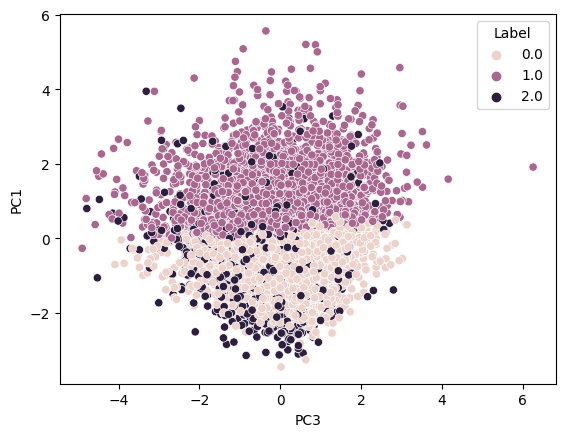

In [45]:
#Scatter Plot for KMeans
sns.scatterplot(x = kmeansDataFrame['PC3'],y = kmeansDataFrame['PC1'],hue='Label',data=kmeansDataFrame)
plt.show()

### 16. Apply Agglomerative clustering and segment the data. (You may use original data or PCA transformed data)

In [46]:
pcaDataFrameNew = pcaDataFrameOne.copy()
pcaDataFrameNew.reset_index(inplace=True,drop=True)
pcaDataFrameNew

,PC1,PC2,PC3,PC4,PC5
0,0.490898,-1.359284,-0.211081,-0.099259,0.103049
1,0.261021,-0.397196,0.579767,-0.128952,0.227299
2,1.908007,6.189917,6.261222,2.756605,4.678400
3,-0.148799,0.515529,-0.497825,-0.597234,0.283391
4,0.555434,-1.626795,-0.385088,-0.256655,0.425152
...,...,...,...,...,...
9995,-0.258093,-1.225113,-0.203088,-0.104216,0.259276
9996,-0.568192,0.726413,-0.837568,2.048098,-0.837479
9997,1.809446,1.886964,-4.549094,-0.361368,1.846519
9998,2.803479,0.639365,-0.150976,-0.175493,-2.236123


In [ ]:
plt.figure(figsize=[15,5])
merg = linkage(pcaDataFrameNew, method='ward')
dendrogram(merg, leaf_rotation=90,)
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

In [ ]:
hieCluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward')
hieClusterModel = hieCluster.fit(pcaDataFrameNew)
labelsDataFrame = pd.DataFrame(hieClusterModel.labels_,columns=['Labels'])
labelsDataFrame.head(5)

In [ ]:
from sklearn.metrics import silhouette_score

for i in range(2,15):
    zVar = KMeans(n_clusters=i)
    zVar = zVar.fit(pcaDataFrameNew)
    labels = zVar.predict(pcaDataFrameNew)
    print(i,silhouette_score(pcaDataFrameNew,labels))

### 17. Perform cluster analysis by doing bivariate analysis between cluster labels and different features and write your conclusion on the results.

In [ ]:
hierDataFrame = dataFrame.join(labelsDataFrame)
hierDataFrame.head()

In [ ]:
hierDataFrame['Labels'].value_counts().plot(kind='pie',autopct='%0.1f')
plt.show()

In [ ]:
# Plot 1 - Clothing Rented for 
sns.countplot(x = hierDataFrame['rented for'],hue='Labels',data=hierDataFrame)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Plot Age of Clothing users
sns.kdeplot(x = hierDataFrame['age'],hue='Labels',data=hierDataFrame)
plt.show()

In [ ]:
# Plot 3 - Rating
sns.kdeplot(x = hierDataFrame['rating'],hue='Labels',data=hierDataFrame)
plt.show()

**Final Results** 

- Plot 1 shows - Clothing is Highly Rented for Weddings and Cluster 0 has highest value followed by Cluster 2 and Cluster 1 Users.

- Plot 2 shows - All of type of age groups are present in all 3 clusters. But highest in Cluster 0 followed by Cluster 2 and Cluster 1

- Plot 3 show - Highest Rating come from Cluster 2 (Most Statisfied Customers) followed by Cluster 0 and Cluster 1
